In [71]:
import pandas
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [347]:
td = pandas.read_table("train.tsv")
print(td)

      id  survived  pclass     sex   age  sibsp  parch      fare embarked
0      3         1       1  female  35.0      1      0   53.1000        S
1      4         0       3    male  35.0      0      0    8.0500        S
2      7         0       3    male   2.0      3      1   21.0750        S
3      9         1       2  female  14.0      1      0   30.0708        C
4     11         1       1  female  58.0      0      0   26.5500        S
5     13         0       3    male  39.0      1      5   31.2750        S
6     16         0       3    male   2.0      4      1   29.1250        Q
7     19         1       3  female   NaN      0      0    7.2250        C
8     23         1       1    male  28.0      0      0   35.5000        S
9     24         0       3  female   8.0      3      1   21.0750        S
10    25         1       3  female  38.0      1      5   31.3875        S
11    26         0       3    male   NaN      0      0    7.2250        C
12    28         1       3  female   N

In [19]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 9 columns):
id          445 non-null int64
survived    445 non-null int64
pclass      445 non-null int64
sex         445 non-null object
age         360 non-null float64
sibsp       445 non-null int64
parch       445 non-null int64
fare        445 non-null float64
embarked    443 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 31.4+ KB


In [348]:
td.to_csv("td.csv")

In [349]:
print(td.isnull().sum())

id           0
survived     0
pclass       0
sex          0
age         85
sibsp        0
parch        0
fare         0
embarked     2
dtype: int64


In [350]:
#欠損値がある為、ageとembarkedを削除
td=td.drop("embarked",axis=1)
td=td.drop("age",axis=1)

In [351]:
#性別も変換
#男：0、女：1
td.sex.replace('male', 0,inplace=True)
td.sex.replace('female', 1,inplace=True)
td.head()

,id,survived,pclass,sex,sibsp,parch,fare
0,3,1,1,1,1,0,53.1000
1,4,0,3,0,0,0,8.0500
2,7,0,3,0,3,1,21.0750
3,9,1,2,1,1,0,30.0708
4,11,1,1,1,0,0,26.5500


In [126]:
td.corr()

,id,survived,pclass,sex,sibsp,parch,fare
id,1.000000,0.024264,-0.059345,-0.033435,-0.020491,-0.031417,0.077649
survived,0.024264,1.000000,-0.358097,0.559465,-0.045087,0.079669,0.258605
pclass,-0.059345,-0.358097,1.000000,-0.193761,0.069857,-0.015726,-0.549651
sex,-0.033435,0.559465,-0.193761,1.000000,0.097883,0.220046,0.168935
sibsp,-0.020491,-0.045087,0.069857,0.097883,1.000000,0.423522,0.164773
parch,-0.031417,0.079669,-0.015726,0.220046,0.423522,1.000000,0.241855
fare,0.077649,0.258605,-0.549651,0.168935,0.164773,0.241855,1.000000


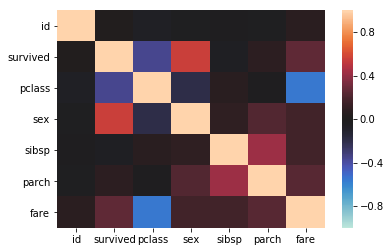

In [161]:
#生存値と各値の相関係数を可視化
heatMap=td.corr()
sns.heatmap(heatMap, vmax=1, vmin=-1, center=0)

In [352]:
#ロジスティック回帰により生存確率を求めてみる
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

#データセットを説明変数と目的変数に分割
X, y = td.drop(["id","survived"],axis=1), td.survived
clf = LogisticRegression()
# Stratified K-Fold CV で性能を評価する
skf = StratifiedKFold(shuffle=True)
scoring = {
    'acc': 'accuracy',
    'auc': 'roc_auc',
}
scores = cross_validate(clf, X, y, cv=skf, scoring=scoring)
print('Accuracy (mean):', scores['test_acc'].mean())
print('AUC (mean):', scores['test_auc'].mean())

Accuracy (mean): 0.7954465902692173
AUC (mean): 0.838918080057863


/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify

In [353]:
#モデルを当てはめてみる
from sklearn.model_selection import train_test_split

X, y = td.drop(["id","survived"],axis=1), td.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0)
clf.fit(X_train, y_train)

print("train result:",clf.score(X_train,y_train))
print("test result:" , clf.score(X_test,y_test))
print("各説明変数の係数:",clf.coef_)

train result: 0.8198198198198198
test result: 0.7321428571428571
各説明変数の係数: [[-0.78344758  2.76533564 -0.15102586 -0.18003761  0.00569394]]


/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [354]:
#標準化によるスケーリングをしてみる
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
clf.fit(X_train_std, y_train)

print("train result:",clf.score(X_train_std,y_train))
print("test result:" , clf.score(X_test_std,y_test))
print("各説明変数の係数:",clf.coef_)

train result: 0.8228228228228228
test result: 0.7321428571428571
各説明変数の係数: [[-0.71021403  1.4221357  -0.18830798 -0.16662194  0.30253793]]


/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [364]:
#提出データについても予測してみる

test = pandas.read_table("test.tsv")
#欠損値がある為、ageとembarkedを削除
#ただしテストデータにはnull値ない可能性あり。
test = test.drop("embarked",axis=1)
test = test.drop("age",axis=1)
#性別も変換
#男：0、女：1
test.sex.replace('male', 0,inplace=True)
test.sex.replace('female', 1,inplace=True)
test.head()

X_predict = test.drop(["id"],axis=1)
#標準化によるスケーリング
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_predict)
X_predict_std=sc.transform(X_predict)
res = clf.predict(X_predict_std)

#提出用にtsv出力
df=pandas.DataFrame(test["id"])
df["res"]=res
df.to_csv("result.tsv",index=False,sep="\t",header=False)

In [372]:
#そんなに結果が良くなさそうなので説明変数の変更をしてみる
td = pandas.read_table("train.tsv")
td.to_csv("td.csv")

#欠損値がある為、ageとembarkedを削除
td=td.drop("embarked",axis=1)
td=td.drop("age",axis=1)
#性別も変換
#男：0、女：1
td.sex.replace('male', 0,inplace=True)
td.sex.replace('female', 1,inplace=True)

#familyカラムとして家族人数を追加
td["family"]=td.sibsp+td.parch
td.head()

,id,survived,pclass,sex,sibsp,parch,fare,family
0,3,1,1,1,1,0,53.1000,1
1,4,0,3,0,0,0,8.0500,0
2,7,0,3,0,3,1,21.0750,4
3,9,1,2,1,1,0,30.0708,1
4,11,1,1,1,0,0,26.5500,0


In [379]:
#モデルを当てはめてみる
from sklearn.model_selection import train_test_split

X, y = td.drop(["id","survived"],axis=1), td.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0)
clf.fit(X_train, y_train)

#標準化によるスケーリング
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X_std=sc.transform(X)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)
clf.fit(X_train_std, y_train)

print("train result:",clf.score(X_train_std,y_train))
print("test result:" , clf.score(X_test_std,y_test))
print("各説明変数の係数:",clf.coef_)

train result: 0.8228228228228228
test result: 0.7232142857142857
各説明変数の係数: [[-0.709804    1.42267016 -0.10297272 -0.10930269  0.30344703 -0.12403885]]


/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/matsushitaei/.pyenv/ver

In [390]:
#結果がそんなに変わらないようなのでモデルとして決定木とランダムフォレストを試す

#決定木
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train_std,y_train)

# Stratified K-Fold CV で性能を評価する
skf = StratifiedKFold(shuffle=True,n_splits=5)
scoring = {
    'acc': 'accuracy',
    'auc': 'roc_auc',
}
scores = cross_validate(clf, X_std, y, cv=skf, scoring=scoring)
print('Accuracy (mean)(決定木):', scores['test_acc'].mean())
print('AUC (mean)(決定木):', scores['test_auc'].mean())


#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train_std,y_train)

# Stratified K-Fold CV で性能を評価する
skf = StratifiedKFold(shuffle=True,n_splits=5)
scoring = {
    'acc': 'accuracy',
    'auc': 'roc_auc',
}
scores = cross_validate(clf, X_std, y, cv=skf, scoring=scoring)
print('Accuracy (mean)(ランダムフォレスト):', scores['test_acc'].mean())
print('AUC (mean)(ランダムフォレスト):', scores['test_auc'].mean())

# SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_std,y_train) 

# Stratified K-Fold CV で性能を評価する
skf = StratifiedKFold(shuffle=True,n_splits=5)
scoring = {
    'acc': 'accuracy',
    'auc': 'roc_auc',
}
scores = cross_validate(clf, X_std, y, cv=skf, scoring=scoring)
print('Accuracy (mean)(SVM):', scores['test_acc'].mean())
print('AUC (mean)(SVM):', scores['test_auc'].mean())

Accuracy (mean)(決定木): 0.7393865622517308
AUC (mean)(決定木): 0.7211607766796446
Accuracy (mean)(ランダムフォレスト): 0.74832709113608
AUC (mean)(ランダムフォレスト): 0.7896235288897763
Accuracy (mean)(SVM): 0.7956730223584157
AUC (mean)(SVM): 0.8374552427539849


/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/matsushitaei/.pyenv/versions/anaconda

In [394]:
#上の結果からSVMが最も精度が高いので、これで提出してみる。
#ランダムフォレストもパラメータのチューニングしたらもっと良くなると思うが、今回は練習のため利用しない

test = pandas.read_table("test.tsv")
#欠損値がある為、ageとembarkedを削除
#ただしテストデータにはnull値ない可能性あり。
test = test.drop("embarked",axis=1)
test = test.drop("age",axis=1)
#性別も変換
#男：0、女：1
test.sex.replace('male', 0,inplace=True)
test.sex.replace('female', 1,inplace=True)

#familyカラムとして家族人数を追加
test["family"]=test.sibsp+test.parch
test.head()

X_predict = test.drop(["id"],axis=1)

#標準化によるスケーリング
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_predict)
X_predict_std=sc.transform(X_predict)

#SVMによる学習
clf = svm.SVC()
clf.fit(X_train_std,y_train)

#テストデータの予測
res = clf.predict(X_predict_std)

#提出用にtsv出力
df=pandas.DataFrame(test["id"])
df["res"]=res
df.to_csv("result.tsv",index=False,sep="\t",header=False)

/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/matsushitaei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
